<a href="https://colab.research.google.com/github/virocodes/anomaly-detection/blob/main/financial_market_anomaly_detection.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

In [ ]:
data = pd.read_csv('./financial_data.csv')

In [ ]:
data

,Y,Data,XAU BGNL,ECSURPUS,BDIY,CRY,DXY,JPY,GBP,Cl1,...,LP01TREU,EMUSTRUU,LF94TRUU,MXUS,MXEU,MXJP,MXBR,MXRU,MXIN,MXCN
0,0,1/11/2000,283.25,0.077,1388.0,157.2600,100.560,105.86,1.6460,25.77,...,116.4640,230.527,123.7620,1416.12,127.75,990.59,856.76,224.33,217.34,34.30
1,0,1/18/2000,287.65,0.043,1405.0,165.0100,101.860,105.47,1.6380,28.85,...,117.2670,231.377,123.7620,1428.79,129.50,993.98,925.22,234.37,227.08,32.74
2,0,1/25/2000,287.15,0.135,1368.0,167.2400,102.410,106.04,1.6500,28.28,...,117.9950,232.390,123.7620,1385.93,126.48,974.83,886.93,216.82,233.00,32.46
3,0,2/1/2000,282.75,0.191,1311.0,166.8500,104.920,107.85,1.6110,28.22,...,120.5100,231.942,122.3280,1385.31,129.19,1007.12,842.60,201.89,237.48,31.29
4,1,2/8/2000,298.40,0.312,1277.0,165.4300,104.220,109.30,1.6110,28.02,...,118.7910,237.812,122.3280,1411.95,134.67,1034.58,945.15,218.00,258.02,31.32
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1106,0,3/23/2021,1727.96,0.339,2271.0,184.5022,92.336,108.72,1.3760,57.76,...,427.7972,1249.403,389.8500,3800.77,140.32,1199.57,1671.73,681.21,1695.96,110.83
1107,0,3/30/2021,1685.56,0.303,2103.0,184.8741,93.297,110.29,1.3719,60.55,...,428.6578,1242.264,385.8145,3835.96,142.76,1206.29,1635.57,693.38,1690.76,108.80
1108,0,4/6/2021,1743.28,0.440,2092.0,185.8393,92.335,109.88,1.3822,59.33,...,430.6649,1250.256,390.6819,3955.16,144.13,1194.62,1689.62,673.20,1689.48,111.92
1109,0,4/13/2021,1742.69,0.467,2140.0,188.1368,91.852,109.19,1.3737,60.18,...,430.4087,1252.563,390.3848,4027.05,144.23,1197.06,1680.82,680.23,1672.46,108.40


In [ ]:
data.shape

(1111, 44)

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1111 entries, 0 to 1110
Data columns (total 44 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Y          1111 non-null   int64  
 1   Data       1111 non-null   object 
 2   XAU BGNL   1111 non-null   float64
 3   ECSURPUS   1111 non-null   float64
 4   BDIY       1111 non-null   float64
 5   CRY        1111 non-null   float64
 6   DXY        1111 non-null   float64
 7   JPY        1111 non-null   float64
 8   GBP        1111 non-null   float64
 9   Cl1        1111 non-null   float64
 10  VIX        1111 non-null   float64
 11  USGG30YR   1111 non-null   float64
 12  GT10       1111 non-null   float64
 13  USGG2YR    1111 non-null   float64
 14  USGG3M     1111 non-null   float64
 15  US0001M    1111 non-null   float64
 16  GTDEM30Y   1111 non-null   float64
 17  GTDEM10Y   1111 non-null   float64
 18  GTDEM2Y    1111 non-null   float64
 19  EONIA      1111 non-null   float64
 20  GTITL30Y

In [ ]:
data.Data = pd.to_datetime(data.Data)

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1111 entries, 0 to 1110
Data columns (total 44 columns):
 #   Column     Non-Null Count  Dtype         
---  ------     --------------  -----         
 0   Y          1111 non-null   int64         
 1   Data       1111 non-null   datetime64[ns]
 2   XAU BGNL   1111 non-null   float64       
 3   ECSURPUS   1111 non-null   float64       
 4   BDIY       1111 non-null   float64       
 5   CRY        1111 non-null   float64       
 6   DXY        1111 non-null   float64       
 7   JPY        1111 non-null   float64       
 8   GBP        1111 non-null   float64       
 9   Cl1        1111 non-null   float64       
 10  VIX        1111 non-null   float64       
 11  USGG30YR   1111 non-null   float64       
 12  GT10       1111 non-null   float64       
 13  USGG2YR    1111 non-null   float64       
 14  USGG3M     1111 non-null   float64       
 15  US0001M    1111 non-null   float64       
 16  GTDEM30Y   1111 non-null   float64       


In [ ]:
data.head()

,Y,Data,XAU BGNL,ECSURPUS,BDIY,CRY,DXY,JPY,GBP,Cl1,...,LP01TREU,EMUSTRUU,LF94TRUU,MXUS,MXEU,MXJP,MXBR,MXRU,MXIN,MXCN
0,0,2000-01-11,283.25,0.077,1388.0,157.26,100.56,105.86,1.646,25.77,...,116.464,230.527,123.762,1416.12,127.75,990.59,856.76,224.33,217.34,34.30
1,0,2000-01-18,287.65,0.043,1405.0,165.01,101.86,105.47,1.638,28.85,...,117.267,231.377,123.762,1428.79,129.50,993.98,925.22,234.37,227.08,32.74
2,0,2000-01-25,287.15,0.135,1368.0,167.24,102.41,106.04,1.650,28.28,...,117.995,232.390,123.762,1385.93,126.48,974.83,886.93,216.82,233.00,32.46
3,0,2000-02-01,282.75,0.191,1311.0,166.85,104.92,107.85,1.611,28.22,...,120.510,231.942,122.328,1385.31,129.19,1007.12,842.60,201.89,237.48,31.29
4,1,2000-02-08,298.40,0.312,1277.0,165.43,104.22,109.30,1.611,28.02,...,118.791,237.812,122.328,1411.95,134.67,1034.58,945.15,218.00,258.02,31.32


In [ ]:
data.Data.dt.year

,Data
0,2000
1,2000
2,2000
3,2000
4,2000
...,...
1106,2021
1107,2021
1108,2021
1109,2021


In [ ]:
data.describe()

,Y,Data,XAU BGNL,ECSURPUS,BDIY,CRY,DXY,JPY,GBP,Cl1,...,LP01TREU,EMUSTRUU,LF94TRUU,MXUS,MXEU,MXJP,MXBR,MXRU,MXIN,MXCN
count,1111.000000,1111,1111.000000,1111.000000,1111.000000,1111.000000,1111.000000,1111.000000,1111.000000,1111.000000,...,1111.000000,1111.000000,1111.000000,1111.000000,1111.000000,1111.000000,1111.000000,1111.000000,1111.000000,1111.000000
mean,0.213321,2010-08-31 00:00:00,987.463744,0.036153,2259.860486,245.247670,90.934982,106.605734,1.569661,60.708101,...,232.109985,704.379545,259.052717,1606.997102,107.877138,784.846292,1903.216436,648.681377,693.156616,53.933159
min,0.000000,2000-01-11 00:00:00,256.680000,-0.974000,291.000000,106.293000,71.329000,75.940000,1.172000,10.010000,...,80.797000,230.527000,121.331000,663.690000,56.300000,431.710000,280.500000,151.250000,112.600000,13.460000
25%,0.000000,2005-05-06 12:00:00,433.740000,-0.191000,990.000000,184.705550,81.240500,101.565000,1.418000,39.625000,...,131.025000,434.661000,205.315500,1103.925000,90.605000,601.615000,1042.645000,463.195000,278.385000,28.565000
50%,0.000000,2010-08-31 00:00:00,1137.800000,0.035000,1518.000000,234.560000,89.716000,108.720000,1.562000,57.400000,...,213.205000,714.807000,264.770000,1324.430000,111.320000,786.830000,1860.960000,612.930000,691.530000,58.740000
75%,0.000000,2015-12-25 12:00:00,1324.825000,0.260500,2685.500000,301.539500,97.404000,116.220000,1.677500,79.640000,...,342.884500,939.824500,320.753000,1992.445000,126.470000,965.875000,2533.770000,793.620000,1014.750000,68.460000
max,1.000000,2021-04-20 00:00:00,2006.910000,0.991000,11793.000000,467.570000,119.820000,134.630000,2.085000,140.970000,...,431.552800,1286.353000,398.706500,4043.690000,146.390000,1210.580000,4721.360000,1617.640000,1730.510000,129.200000
std,0.409837,NaN,494.623740,0.349453,2017.811888,68.278066,11.379095,12.840754,0.212344,25.900813,...,109.917628,309.951757,75.934451,698.481956,20.795973,200.076443,986.468254,299.096020,405.527014,24.738356


In [ ]:
data.VIX.describe()

,VIX
count,1111.000000
mean,19.992169
std,8.642157
min,9.430000
25%,13.640000
50%,17.980000
75%,23.625000
max,75.910000


In [ ]:
data.USGG30YR.describe()

,USGG30YR
count,1111.000000
mean,3.908361
std,1.178584
min,1.163000
25%,2.960000
50%,4.100000
75%,4.844500
max,6.747000


In [ ]:
data.columns

Index(['Y', 'Data', 'XAU BGNL', 'ECSURPUS', 'BDIY', 'CRY', 'DXY', 'JPY', 'GBP',
       'Cl1', 'VIX', 'USGG30YR', 'GT10', 'USGG2YR', 'USGG3M', 'US0001M',
       'GTDEM30Y', 'GTDEM10Y', 'GTDEM2Y', 'EONIA', 'GTITL30YR', 'GTITL10YR',
       'GTITL2YR', 'GTJPY30YR', 'GTJPY10YR', 'GTJPY2YR', 'GTGBP30Y',
       'GTGBP20Y', 'GTGBP2Y', 'LUMSTRUU', 'LMBITR', 'LUACTRUU', 'LF98TRUU',
       'LG30TRUU', 'LP01TREU', 'EMUSTRUU', 'LF94TRUU', 'MXUS', 'MXEU', 'MXJP',
       'MXBR', 'MXRU', 'MXIN', 'MXCN'],
      dtype='object')

In [ ]:
main_data = data.columns[2:]
str(list(main_data))

"['XAU BGNL', 'ECSURPUS', 'BDIY', 'CRY', 'DXY', 'JPY', 'GBP', 'Cl1', 'VIX', 'USGG30YR', 'GT10', 'USGG2YR', 'USGG3M', 'US0001M', 'GTDEM30Y', 'GTDEM10Y', 'GTDEM2Y', 'EONIA', 'GTITL30YR', 'GTITL10YR', 'GTITL2YR', 'GTJPY30YR', 'GTJPY10YR', 'GTJPY2YR', 'GTGBP30Y', 'GTGBP20Y', 'GTGBP2Y', 'LUMSTRUU', 'LMBITR', 'LUACTRUU', 'LF98TRUU', 'LG30TRUU', 'LP01TREU', 'EMUSTRUU', 'LF94TRUU', 'MXUS', 'MXEU', 'MXJP', 'MXBR', 'MXRU', 'MXIN', 'MXCN']"

In [ ]:
len(main_data)

42

In [ ]:
%pip install openai

In [ ]:
from openai import OpenAI
from google.colab import userdata
api_key = userdata.get('OPENAI_API_KEY')
client = OpenAI(
    api_key=api_key
)

In [ ]:
sys_prompt = """
You are a machine learning and financial expert that is helping work on a financial anomaly detection model. The goal right now is to understand the data.
We have time series data of prices of many things like stocks, bonds, currencies, financial indicators, etc.
Right now we want to figure out what each of those things are, what they mean, and how they can help us detect anomalies.
For example, if you are asked about VIX, say something like: 'VIX measures the volatility of the market and is a forward looking indicator, so a spike in the price of VIX is a potential anomaly that can indicate a black swan event.'
Obviously, make it more detailed and financially sound than that.
Make sure to explain any complex financial terms or concepts in a way that anyone can understand.
You will be given a list of all the indicators in our dataset.
For each one, tell me what it is, what it means, and how it can help us detect anomalies.
Then tell me which ones are most important in identifying anomalies that we should pay attention to the most.
Also, tell me which ones are not necessarily too important, and may be discarded if we want to do principal component analysis.
"""

prompt = f'Explain these: {str(list(main_data))}'

completion = client.chat.completions.create(
    model="gpt-4o",
    messages=[
        {"role": "developer", "content": sys_prompt},
        {"role": "user", "content": prompt},
    ]
)

message = completion.choices[0].message.content
print(message)

Let's delve into the understanding of each of these indicators and determine their importance in detecting financial anomalies.

1. **XAU BGNL**: This indicator likely refers to the price of Gold (XAU), specifically in BGN (Bulgarian Lev). Gold, being a traditional safe haven asset, can reflect market sentiment. Spikes in gold prices often indicate increased risk aversion in the market, serving as a signal of potential financial stress or geopolitical tensions.

2. **ECSURPUS**: This likely refers to economic surplus data from the US, which indicates the balance of trade and investment income. Persistent changes or anomalies in this measure might signal shifts in economic conditions, potentially indicating fiscal or monetary policy changes.

3. **BDIY (Baltic Dry Index)**: This is a shipping and trade index that tracks the rates to transport raw materials via shipping routes. It’s a leading indicator for economic growth as it reflects demand for resources needed for production. A sharp

In [ ]:
vix_overtime = data[['Y','Data','VIX']]

<Axes: xlabel='Data', ylabel='VIX'>

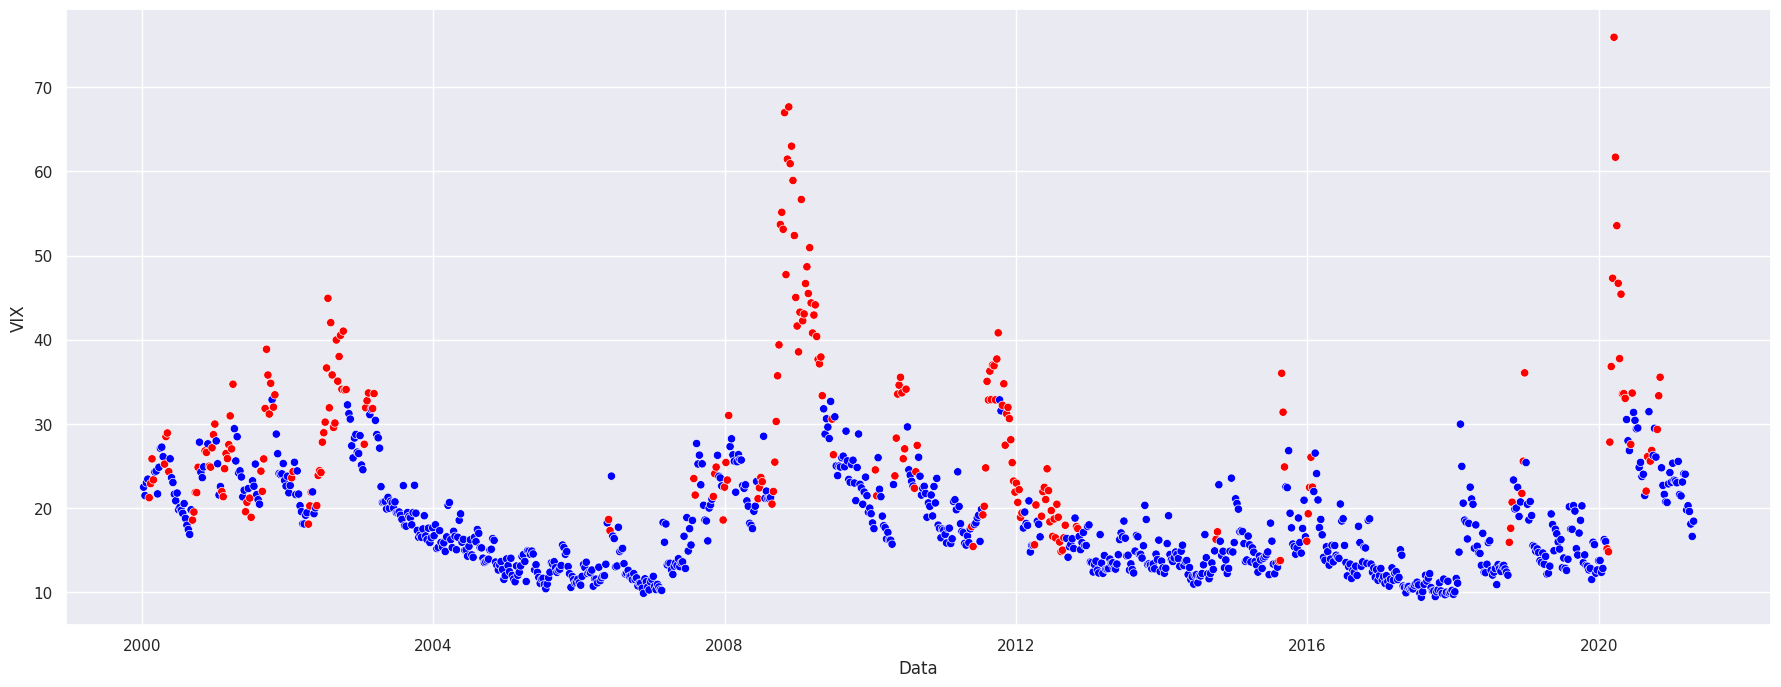

In [ ]:
sns.set_theme()
plt.figure(figsize=(22,8))
sns.scatterplot(
    data=vix_overtime,
    x='Data',
    y='VIX',
    color=['red' if y == 1 else 'blue' for y in vix_overtime['Y']]
)

In [ ]:
def plot_overtime(dataframe, column):
  overtime = dataframe[['Y', 'Data', column]]
  sns.set_theme()
  plt.figure(figsize=(22,8))
  sns.scatterplot(
      data=overtime,
      x='Data',
      y=column,
      color=['red' if y == 1 else 'blue' for y in overtime['Y']]
  )

In [ ]:
plot_overtime('USGG30YR')

TypeError: plot_overtime() missing 1 required positional argument: 'column'

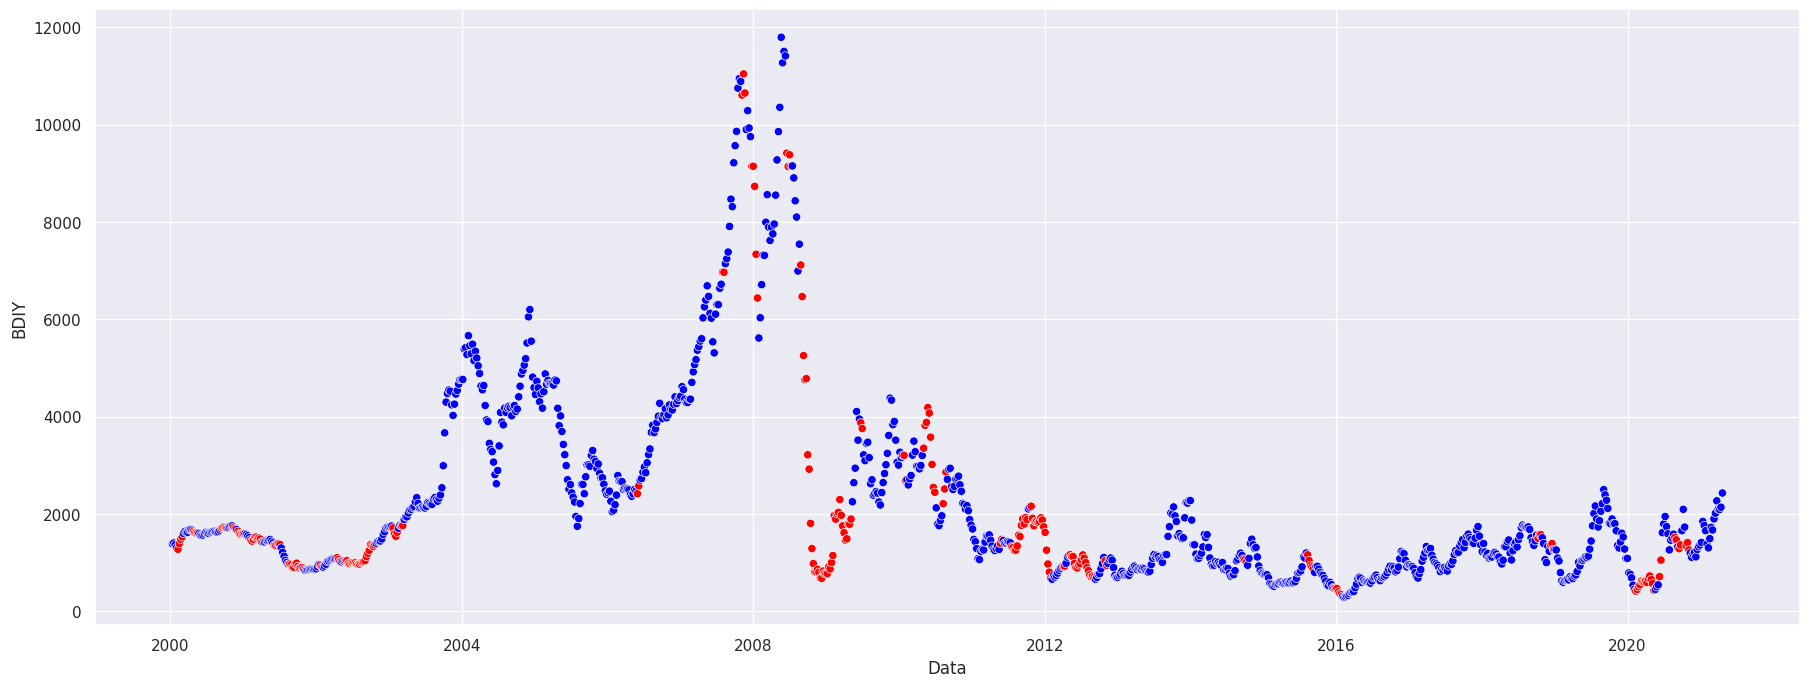

In [ ]:
plot_overtime('BDIY')

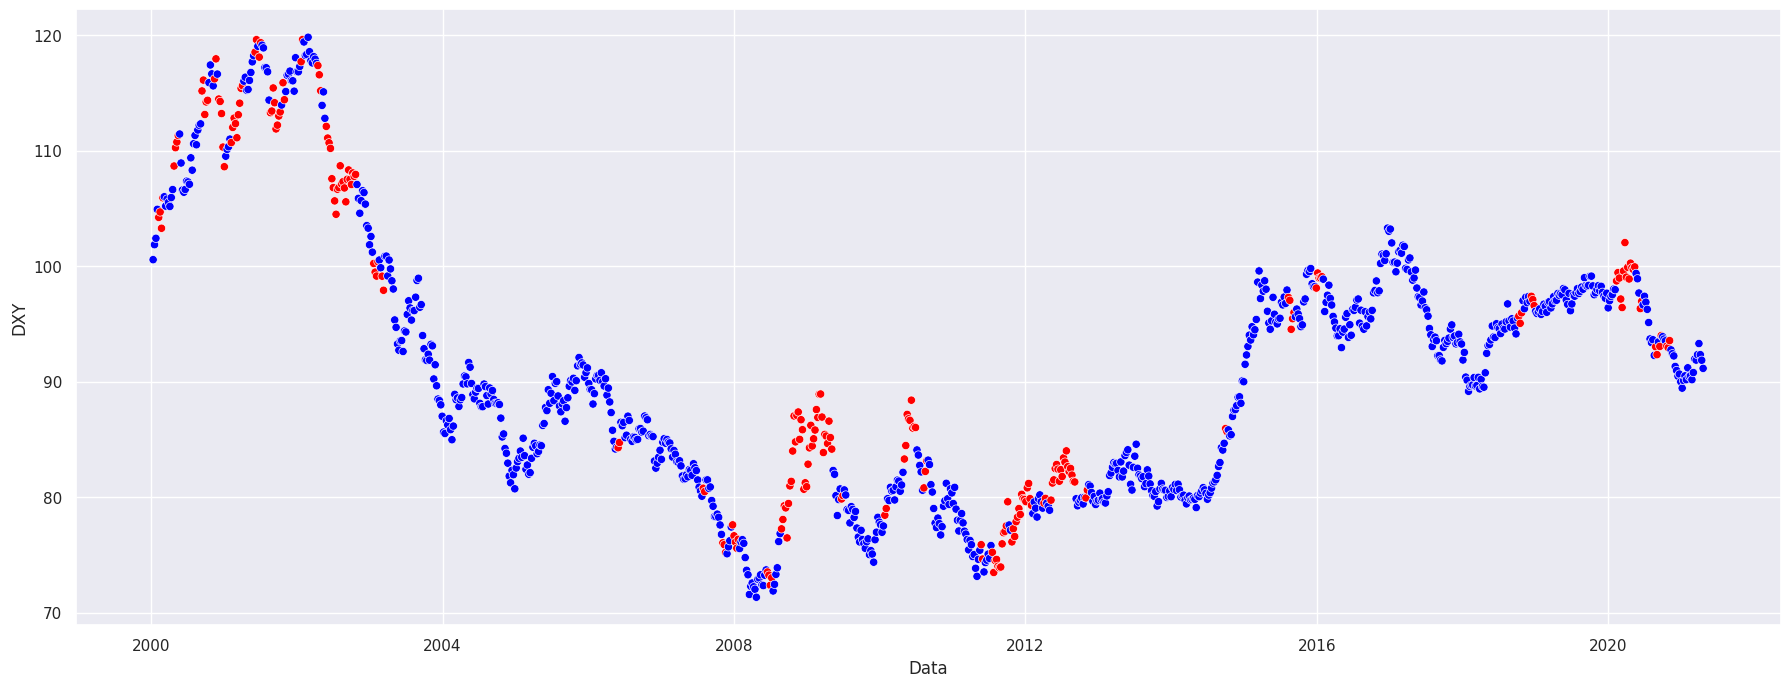

In [ ]:
plot_overtime('DXY')

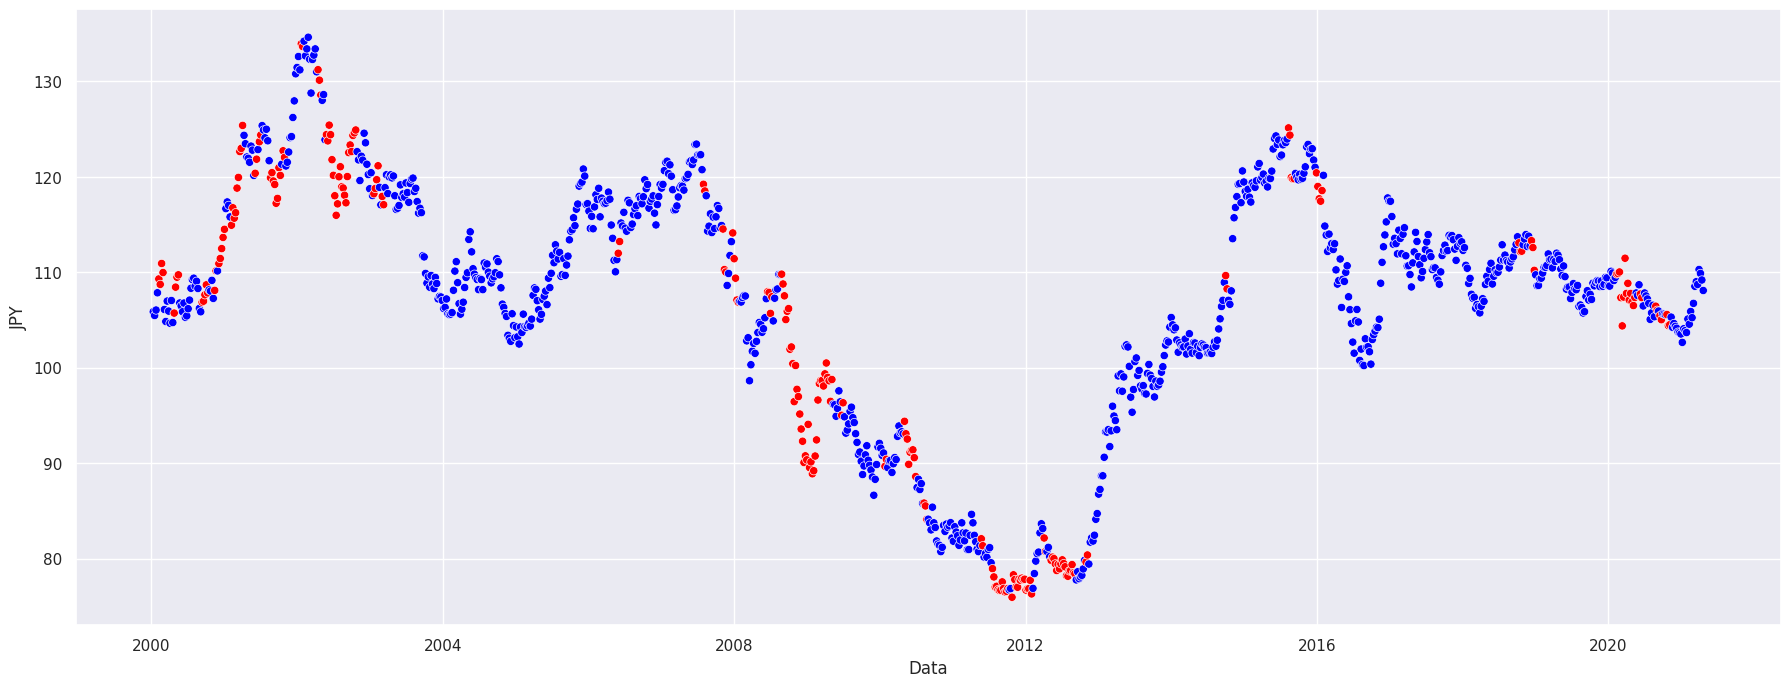

In [ ]:
plot_overtime('JPY')

In [ ]:
from sklearn.model_selection import TimeSeriesSplit

tss = TimeSeriesSplit(n_splits=3)

In [ ]:
data

,Y,Data,XAU BGNL,ECSURPUS,BDIY,CRY,DXY,JPY,GBP,Cl1,...,LP01TREU,EMUSTRUU,LF94TRUU,MXUS,MXEU,MXJP,MXBR,MXRU,MXIN,MXCN
0,0,2000-01-11,283.25,0.077,1388.0,157.2600,100.560,105.86,1.6460,25.77,...,116.4640,230.527,123.7620,1416.12,127.75,990.59,856.76,224.33,217.34,34.30
1,0,2000-01-18,287.65,0.043,1405.0,165.0100,101.860,105.47,1.6380,28.85,...,117.2670,231.377,123.7620,1428.79,129.50,993.98,925.22,234.37,227.08,32.74
2,0,2000-01-25,287.15,0.135,1368.0,167.2400,102.410,106.04,1.6500,28.28,...,117.9950,232.390,123.7620,1385.93,126.48,974.83,886.93,216.82,233.00,32.46
3,0,2000-02-01,282.75,0.191,1311.0,166.8500,104.920,107.85,1.6110,28.22,...,120.5100,231.942,122.3280,1385.31,129.19,1007.12,842.60,201.89,237.48,31.29
4,1,2000-02-08,298.40,0.312,1277.0,165.4300,104.220,109.30,1.6110,28.02,...,118.7910,237.812,122.3280,1411.95,134.67,1034.58,945.15,218.00,258.02,31.32
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1106,0,2021-03-23,1727.96,0.339,2271.0,184.5022,92.336,108.72,1.3760,57.76,...,427.7972,1249.403,389.8500,3800.77,140.32,1199.57,1671.73,681.21,1695.96,110.83
1107,0,2021-03-30,1685.56,0.303,2103.0,184.8741,93.297,110.29,1.3719,60.55,...,428.6578,1242.264,385.8145,3835.96,142.76,1206.29,1635.57,693.38,1690.76,108.80
1108,0,2021-04-06,1743.28,0.440,2092.0,185.8393,92.335,109.88,1.3822,59.33,...,430.6649,1250.256,390.6819,3955.16,144.13,1194.62,1689.62,673.20,1689.48,111.92
1109,0,2021-04-13,1742.69,0.467,2140.0,188.1368,91.852,109.19,1.3737,60.18,...,430.4087,1252.563,390.3848,4027.05,144.23,1197.06,1680.82,680.23,1672.46,108.40


# Logistic Regression Model



In [ ]:
data_new = data.copy()[['Y', 'Data', 'VIX', 'BDIY', 'DXY', 'USGG30YR', 'GT10', 'GTDEM10Y']]
data_new.set_index('Data', inplace=True)
data_new.sort_index(inplace=True)
data_new

,Y,VIX,BDIY,DXY,USGG30YR,GT10,GTDEM10Y
Data,,,,,,,
2000-01-11,0,22.50,1388.0,100.560,6.6710,6.657,5.541
2000-01-18,0,21.50,1405.0,101.860,6.7470,6.748,5.644
2000-01-25,0,23.02,1368.0,102.410,6.6340,6.692,5.515
2000-02-01,0,23.45,1311.0,104.920,6.4230,6.619,5.459
2000-02-08,1,21.25,1277.0,104.220,6.2310,6.613,5.482
...,...,...,...,...,...,...,...
2021-03-23,0,20.30,2271.0,92.336,2.3264,1.622,-0.343
2021-03-30,0,19.61,2103.0,93.297,2.3687,1.706,-0.288
2021-04-06,0,18.12,2092.0,92.335,2.3230,1.658,-0.317


In [ ]:
for i in ['VIX', 'BDIY', 'DXY', 'USGG30YR', 'GT10', 'GTDEM10Y']:
  data_new[f'{i}_moving_average'] = data_new[i].rolling(window=4, min_periods=1).mean()

In [ ]:
data_new

,Y,VIX,BDIY,DXY,USGG30YR,GT10,GTDEM10Y,VIX_moving_average,BDIY_moving_average,DXY_moving_average,USGG30YR_moving_average,GT10_moving_average,GTDEM10Y_moving_average
Data,,,,,,,,,,,,,
2000-01-11,0,22.50,1388.0,100.560,6.6710,6.657,5.541,22.5000,1388.00,100.56000,6.671000,6.65700,5.541000
2000-01-18,0,21.50,1405.0,101.860,6.7470,6.748,5.644,22.0000,1396.50,101.21000,6.709000,6.70250,5.592500
2000-01-25,0,23.02,1368.0,102.410,6.6340,6.692,5.515,22.3400,1387.00,101.61000,6.684000,6.69900,5.566667
2000-02-01,0,23.45,1311.0,104.920,6.4230,6.619,5.459,22.6175,1368.00,102.43750,6.618750,6.67900,5.539750
2000-02-08,1,21.25,1277.0,104.220,6.2310,6.613,5.482,22.3050,1340.25,103.35250,6.508750,6.66800,5.525000
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2021-03-23,0,20.30,2271.0,92.336,2.3264,1.622,-0.343,22.0550,1965.50,91.73600,2.282425,1.54075,-0.333500
2021-03-30,0,19.61,2103.0,93.297,2.3687,1.706,-0.288,20.9325,2073.00,92.36400,2.326775,1.61900,-0.317250
2021-04-06,0,18.12,2092.0,92.335,2.3230,1.658,-0.317,19.4550,2120.75,92.45825,2.349150,1.65150,-0.321250


In [ ]:
X = data_new.drop('Y', axis=1)
y = data_new['Y']

In [ ]:
y

,Y
Data,
2000-01-11,0
2000-01-18,0
2000-01-25,0
2000-02-01,0
2000-02-08,1
...,...
2021-03-23,0
2021-03-30,0
2021-04-06,0


In [ ]:
for train_index, test_index in tss.split(X):
  X_train, X_test = X.iloc[train_index, :], X.iloc[test_index, :]
  y_train, y_test = y.iloc[train_index], y.iloc[test_index]

In [ ]:
X_train

,VIX,BDIY,DXY,USGG30YR,GT10,GTDEM10Y,VIX_moving_average,BDIY_moving_average,DXY_moving_average,USGG30YR_moving_average,GT10_moving_average,GTDEM10Y_moving_average
Data,,,,,,,,,,,,
2000-01-11,22.50,1388.0,100.560,6.671,6.657,5.541,22.5000,1388.00,100.56000,6.67100,6.65700,5.541000
2000-01-18,21.50,1405.0,101.860,6.747,6.748,5.644,22.0000,1396.50,101.21000,6.70900,6.70250,5.592500
2000-01-25,23.02,1368.0,102.410,6.634,6.692,5.515,22.3400,1387.00,101.61000,6.68400,6.69900,5.566667
2000-02-01,23.45,1311.0,104.920,6.423,6.619,5.459,22.6175,1368.00,102.43750,6.61875,6.67900,5.539750
2000-02-08,21.25,1277.0,104.220,6.231,6.613,5.482,22.3050,1340.25,103.35250,6.50875,6.66800,5.525000
...,...,...,...,...,...,...,...,...,...,...,...,...
2015-12-01,14.67,598.0,99.795,2.902,2.144,0.467,16.1825,571.25,99.56150,3.01825,2.24825,0.531500
2015-12-08,17.60,551.0,98.474,2.955,2.219,0.570,16.7600,553.50,99.35675,2.97825,2.21725,0.519000
2015-12-15,20.95,484.0,98.217,2.986,2.267,0.640,17.2875,540.25,99.00325,2.96125,2.21725,0.548250


In [ ]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()

X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [ ]:
from sklearn.linear_model import LogisticRegression

logreg = LogisticRegression(random_state=0, max_iter=9999999)

logreg.fit(X_train, y_train)

y_pred = logreg.predict(X_test)

In [ ]:
from sklearn import metrics

cnf_matrix = metrics.confusion_matrix(y_test, y_pred)
cnf_matrix

array([[220,  24],
       [ 10,  23]])

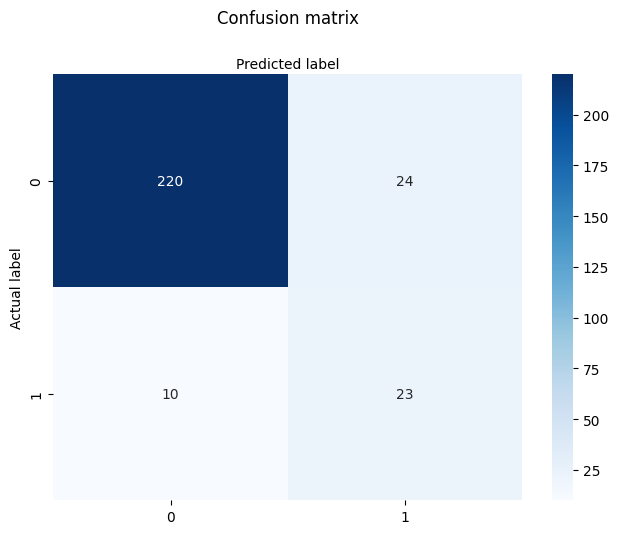

In [ ]:
class_names = [0, 1]
fig, ax = plt.subplots()
tick_marks = np.arange(len(class_names))
plt.xticks(tick_marks, class_names)
plt.yticks(tick_marks, class_names)
sns.heatmap(pd.DataFrame(cnf_matrix), annot=True, cmap="Blues", fmt='g')
ax.xaxis.set_label_position("top")
plt.tight_layout()
plt.title('Confusion matrix', y=1.1)
plt.ylabel('Actual label')
plt.xlabel('Predicted label')

plt.show()

In [ ]:
from sklearn.metrics import classification_report

print(classification_report(y_test, y_pred, target_names=['not anomaly', 'anomaly']))

              precision    recall  f1-score   support

 not anomaly       0.96      0.90      0.93       244
     anomaly       0.49      0.70      0.57        33

    accuracy                           0.88       277
   macro avg       0.72      0.80      0.75       277
weighted avg       0.90      0.88      0.89       277



# Isolation Forest Model

In [ ]:
data2 = data_new.copy()
data2

,Y,VIX,BDIY,DXY,USGG30YR,GT10,GTDEM10Y,VIX_moving_average,BDIY_moving_average,DXY_moving_average,USGG30YR_moving_average,GT10_moving_average,GTDEM10Y_moving_average
Data,,,,,,,,,,,,,
2000-01-11,0,22.50,1388.0,100.560,6.6710,6.657,5.541,22.5000,1388.00,100.56000,6.671000,6.65700,5.541000
2000-01-18,0,21.50,1405.0,101.860,6.7470,6.748,5.644,22.0000,1396.50,101.21000,6.709000,6.70250,5.592500
2000-01-25,0,23.02,1368.0,102.410,6.6340,6.692,5.515,22.3400,1387.00,101.61000,6.684000,6.69900,5.566667
2000-02-01,0,23.45,1311.0,104.920,6.4230,6.619,5.459,22.6175,1368.00,102.43750,6.618750,6.67900,5.539750
2000-02-08,1,21.25,1277.0,104.220,6.2310,6.613,5.482,22.3050,1340.25,103.35250,6.508750,6.66800,5.525000
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2021-03-23,0,20.30,2271.0,92.336,2.3264,1.622,-0.343,22.0550,1965.50,91.73600,2.282425,1.54075,-0.333500
2021-03-30,0,19.61,2103.0,93.297,2.3687,1.706,-0.288,20.9325,2073.00,92.36400,2.326775,1.61900,-0.317250
2021-04-06,0,18.12,2092.0,92.335,2.3230,1.658,-0.317,19.4550,2120.75,92.45825,2.349150,1.65150,-0.321250


In [ ]:
def plot_overtime(dataframe, column):
  overtime = dataframe[['Y', column]]
  sns.set_theme()
  plt.figure(figsize=(22,8))
  sns.scatterplot(
      data=overtime,
      x='Data',
      y=column,
      color=['red' if y == 1 else 'blue' for y in overtime['Y']]
  )

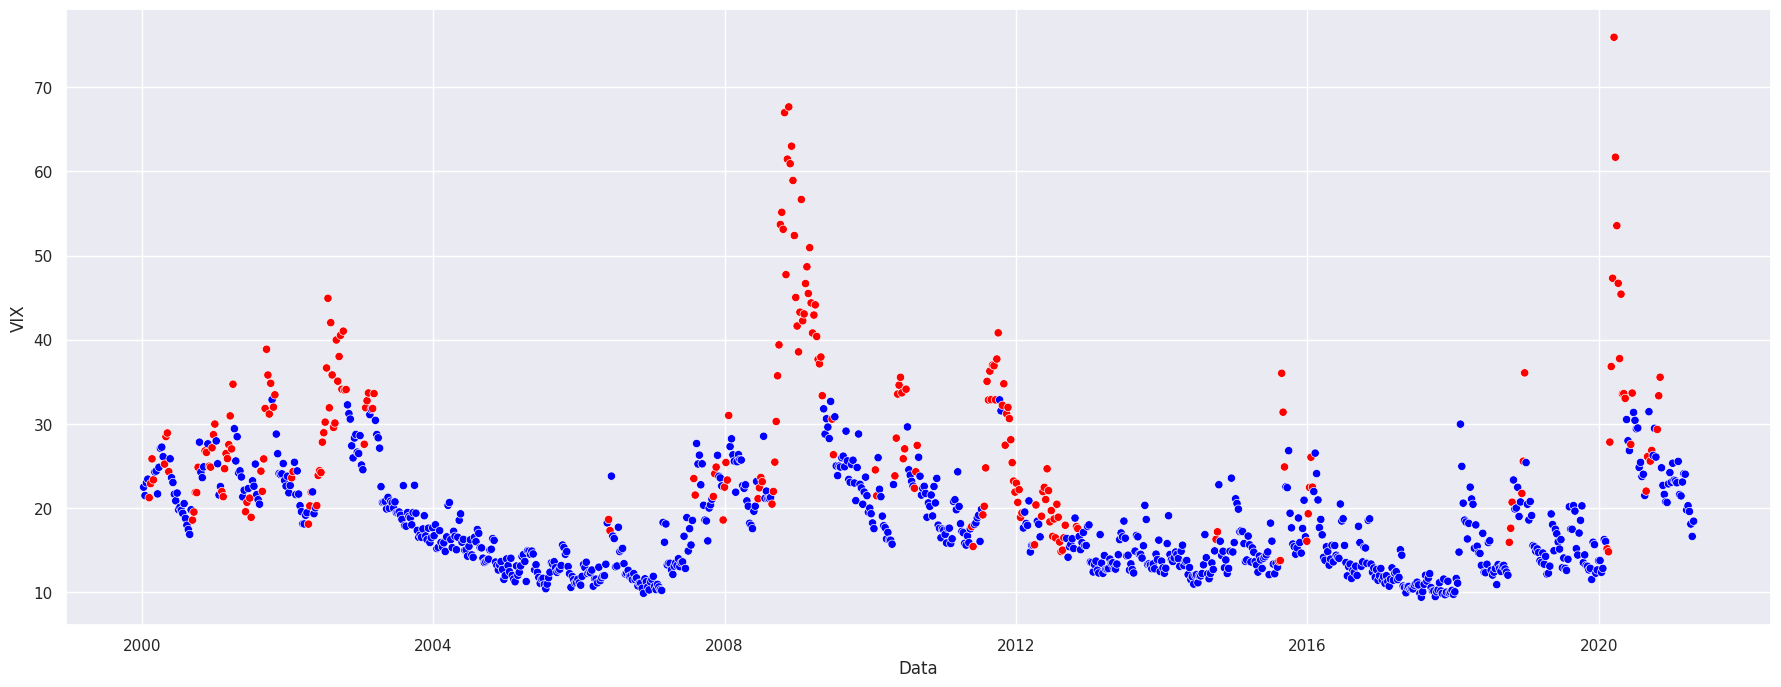

In [ ]:
#data2.columns
plot_overtime(data2, 'VIX')

In [ ]:

X = data2.drop('Y', axis=1)
y = data2['Y']
X

,VIX,BDIY,DXY,USGG30YR,GT10,GTDEM10Y,VIX_moving_average,BDIY_moving_average,DXY_moving_average,USGG30YR_moving_average,GT10_moving_average,GTDEM10Y_moving_average
Data,,,,,,,,,,,,
2000-01-11,22.50,1388.0,100.560,6.6710,6.657,5.541,22.5000,1388.00,100.56000,6.671000,6.65700,5.541000
2000-01-18,21.50,1405.0,101.860,6.7470,6.748,5.644,22.0000,1396.50,101.21000,6.709000,6.70250,5.592500
2000-01-25,23.02,1368.0,102.410,6.6340,6.692,5.515,22.3400,1387.00,101.61000,6.684000,6.69900,5.566667
2000-02-01,23.45,1311.0,104.920,6.4230,6.619,5.459,22.6175,1368.00,102.43750,6.618750,6.67900,5.539750
2000-02-08,21.25,1277.0,104.220,6.2310,6.613,5.482,22.3050,1340.25,103.35250,6.508750,6.66800,5.525000
...,...,...,...,...,...,...,...,...,...,...,...,...
2021-03-23,20.30,2271.0,92.336,2.3264,1.622,-0.343,22.0550,1965.50,91.73600,2.282425,1.54075,-0.333500
2021-03-30,19.61,2103.0,93.297,2.3687,1.706,-0.288,20.9325,2073.00,92.36400,2.326775,1.61900,-0.317250
2021-04-06,18.12,2092.0,92.335,2.3230,1.658,-0.317,19.4550,2120.75,92.45825,2.349150,1.65150,-0.321250


In [ ]:
y

,Y
Data,
2000-01-11,0
2000-01-18,0
2000-01-25,0
2000-02-01,0
2000-02-08,1
...,...
2021-03-23,0
2021-03-30,0
2021-04-06,0


In [ ]:
cont = y.value_counts()
cont

,count
Y,
0,874
1,237


In [ ]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()

X = sc.fit_transform(X)

In [ ]:
from sklearn.ensemble import IsolationForest

iso = IsolationForest(max_samples=100, random_state=0, contamination='auto', n_estimators=100, verbose=1, n_jobs=-1)

iso.fit(X)

[Parallel(n_jobs=2)]: Using backend ThreadingBackend with 2 concurrent workers.
[Parallel(n_jobs=2)]: Done   2 out of   2 | elapsed:    0.2s finished


IsolationForest(max_samples=100, n_jobs=-1, random_state=0, verbose=1)

In [ ]:
y_pred = iso.predict(X)
pred_adjusted = [1 if i == -1 else 0 for i in y_pred]
sum(pred_adjusted)

[Parallel(n_jobs=1)]: Done  49 tasks      | elapsed:    0.0s


342

In [ ]:
from sklearn import metrics

cnf_matrix = metrics.confusion_matrix(y, pred_adjusted)
cnf_matrix

array([[689, 185],
       [ 80, 157]])

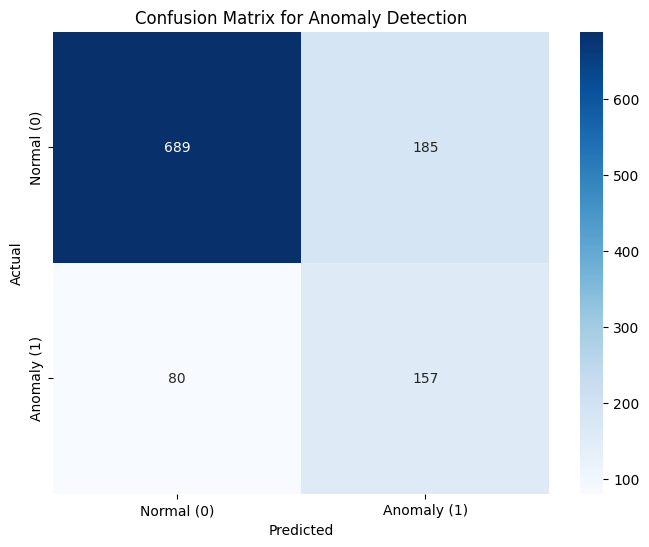

In [ ]:
plt.figure(figsize=(8, 6))
sns.heatmap(cnf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=['Normal (0)', 'Anomaly (1)'],
            yticklabels=['Normal (0)', 'Anomaly (1)'])

# Add labels and title
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix for Anomaly Detection')
plt.show()


In [ ]:
from sklearn.metrics import classification_report

print(classification_report(y, pred_adjusted, target_names=['not anomaly', 'anomaly']))

              precision    recall  f1-score   support

 not anomaly       0.90      0.79      0.84       874
     anomaly       0.46      0.66      0.54       237

    accuracy                           0.76      1111
   macro avg       0.68      0.73      0.69      1111
weighted avg       0.80      0.76      0.78      1111



In [ ]:
scores = iso.score_samples(X)

[Parallel(n_jobs=1)]: Done  49 tasks      | elapsed:    0.0s


(array([ 0., 10., 20., 30., 40., 50., 60., 70., 80., 90.]),
 [Text(0, 0.0, '0'),
  Text(0, 10.0, '10'),
  Text(0, 20.0, '20'),
  Text(0, 30.0, '30'),
  Text(0, 40.0, '40'),
  Text(0, 50.0, '50'),
  Text(0, 60.0, '60'),
  Text(0, 70.0, '70'),
  Text(0, 80.0, '80'),
  Text(0, 90.0, '90')])

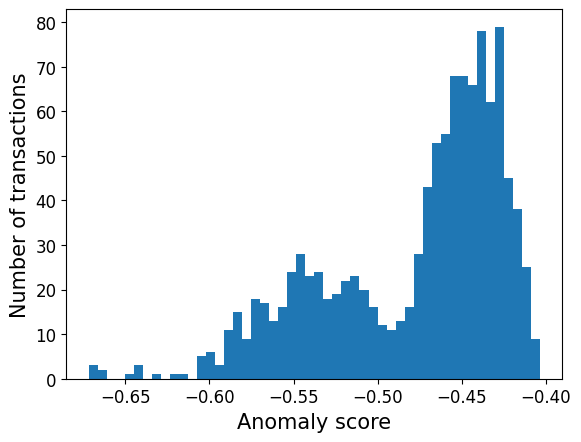

In [ ]:
# plot anomaly score distribution
plt.hist(scores, bins=50)
plt.ylabel('Number of transactions', fontsize=15)
plt.xlabel('Anomaly score', fontsize=15)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)

Top n Outliers

In [ ]:
top_n_outliers = 10
top_n_outlier_indices = np.argpartition(scores, top_n_outliers)[:top_n_outliers].tolist()
#top_outlier_entries = transactions.iloc[top_n_outlier_indices, :]
#top_outlier_features = X.iloc[top_n_outlier_indices, :]
#top_outlier_features
print(np.argpartition(scores, 5)[:5].tolist())
print(np.argpartition(scores, 10)[:10].tolist())

[1053, 1058, 1056, 1055, 1054]
[1057, 1056, 1058, 1053, 1054, 1055, 1059, 1061, 1060, 1052]


# XGBoost Model

In [ ]:
!pip install scikit-learn==1.2.0

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 9.5/9.5 MB 48.3 MB/s eta 0:00:00
  Attempting uninstall: scikit-learn
    Found existing installation: scikit-learn 1.6.0
    Uninstalling scikit-learn-1.6.0:
      Successfully uninstalled scikit-learn-1.6.0
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
bigframes 1.31.0 requires scikit-learn>=1.2.2, but you have scikit-learn 1.2.0 which is incompatible.
imbalanced-learn 0.13.0 requires scikit-learn<2,>=1.3.2, but you have scikit-learn 1.2.0 which is incompatible.
mlxtend 0.23.3 requires scikit-learn>=1.3.1, but you have scikit-learn 1.2.0 which is incompatible.


In [ ]:
from xgboost import XGBRegressor, XGBClassifier

In [ ]:
data_new2 = data.copy()[['Data', 'Y', 'VIX', 'BDIY', 'DXY', 'USGG30YR', 'GT10', 'GTDEM10Y']]
data_new2.set_index('Data', inplace=True)
data_new2.sort_index(inplace=True)
data_new2

,Y,VIX,BDIY,DXY,USGG30YR,GT10,GTDEM10Y
Data,,,,,,,
2000-01-11,0,22.50,1388.0,100.560,6.6710,6.657,5.541
2000-01-18,0,21.50,1405.0,101.860,6.7470,6.748,5.644
2000-01-25,0,23.02,1368.0,102.410,6.6340,6.692,5.515
2000-02-01,0,23.45,1311.0,104.920,6.4230,6.619,5.459
2000-02-08,1,21.25,1277.0,104.220,6.2310,6.613,5.482
...,...,...,...,...,...,...,...
2021-03-23,0,20.30,2271.0,92.336,2.3264,1.622,-0.343
2021-03-30,0,19.61,2103.0,93.297,2.3687,1.706,-0.288
2021-04-06,0,18.12,2092.0,92.335,2.3230,1.658,-0.317


In [ ]:
list(data_new2.columns.drop('Y'))

['VIX', 'BDIY', 'DXY', 'USGG30YR', 'GT10', 'GTDEM10Y']

In [ ]:
data3 = data_new2.copy()
for i in list(data_new2.columns.drop('Y')):
  data3[f'{i}_std'] = data3[i].rolling(window=4, min_periods=1).std().fillna(0)
# data3['month'] = data3.index.month
data3

,Y,VIX,BDIY,DXY,USGG30YR,GT10,GTDEM10Y,VIX_std,BDIY_std,DXY_std,USGG30YR_std,GT10_std,GTDEM10Y_std
Data,,,,,,,,,,,,,
2000-01-11,0,22.50,1388.0,100.560,6.6710,6.657,5.541,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
2000-01-18,0,21.50,1405.0,101.860,6.7470,6.748,5.644,0.707107,12.020815,0.919239,0.053740,0.064347,0.072832
2000-01-25,0,23.02,1368.0,102.410,6.6340,6.692,5.515,0.772528,18.520259,0.950000,0.057611,0.045902,0.068223
2000-02-01,0,23.45,1311.0,104.920,6.4230,6.619,5.459,0.840174,40.898248,1.827756,0.138719,0.054815,0.077466
2000-02-08,1,21.25,1277.0,104.220,6.2310,6.613,5.482,1.092901,57.209411,1.452065,0.228727,0.064296,0.082595
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2021-03-23,0,20.30,2271.0,92.336,2.3264,1.622,-0.343,2.330443,248.796436,0.665914,0.085365,0.107819,0.022650
2021-03-30,0,19.61,2103.0,93.297,2.3687,1.706,-0.288,2.085575,155.803295,0.654500,0.066165,0.072709,0.026912
2021-04-06,0,18.12,2092.0,92.335,2.3230,1.658,-0.317,0.936750,107.208131,0.601549,0.028548,0.040311,0.024798


In [ ]:
X = data3.drop('Y', axis=1)
y = data3['Y']

In [ ]:
X

,VIX,BDIY,DXY,USGG30YR,GT10,GTDEM10Y,VIX_std,BDIY_std,DXY_std,USGG30YR_std,GT10_std,GTDEM10Y_std
Data,,,,,,,,,,,,
2000-01-11,22.50,1388.0,100.560,6.6710,6.657,5.541,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
2000-01-18,21.50,1405.0,101.860,6.7470,6.748,5.644,0.707107,12.020815,0.919239,0.053740,0.064347,0.072832
2000-01-25,23.02,1368.0,102.410,6.6340,6.692,5.515,0.772528,18.520259,0.950000,0.057611,0.045902,0.068223
2000-02-01,23.45,1311.0,104.920,6.4230,6.619,5.459,0.840174,40.898248,1.827756,0.138719,0.054815,0.077466
2000-02-08,21.25,1277.0,104.220,6.2310,6.613,5.482,1.092901,57.209411,1.452065,0.228727,0.064296,0.082595
...,...,...,...,...,...,...,...,...,...,...,...,...
2021-03-23,20.30,2271.0,92.336,2.3264,1.622,-0.343,2.330443,248.796436,0.665914,0.085365,0.107819,0.022650
2021-03-30,19.61,2103.0,93.297,2.3687,1.706,-0.288,2.085575,155.803295,0.654500,0.066165,0.072709,0.026912
2021-04-06,18.12,2092.0,92.335,2.3230,1.658,-0.317,0.936750,107.208131,0.601549,0.028548,0.040311,0.024798


In [ ]:
y

,Y
Data,
2000-01-11,0
2000-01-18,0
2000-01-25,0
2000-02-01,0
2000-02-08,1
...,...
2021-03-23,0
2021-03-30,0
2021-04-06,0


In [ ]:
from sklearn.model_selection import TimeSeriesSplit

tss = TimeSeriesSplit(n_splits=3)

In [ ]:
for train_index, test_index in tss.split(X):
  X_train, X_test = X.iloc[train_index, :], X.iloc[test_index, :]
  y_train, y_test = y.iloc[train_index], y.iloc[test_index]

In [ ]:
cont = y.value_counts('Y')
cont[1]

0.21332133213321333

In [ ]:
clf = XGBClassifier(
    max_depth=6,
    n_estimators=65,
    learning_rate=0.3,
    scale_pos_weight=0.4
)
clf.fit(X_train, y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.3, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=6, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=65, n_jobs=None,
              num_parallel_tree=None, random_state=None, ...)

In [ ]:
y_pred = clf.predict(X_test)

In [ ]:
from sklearn import metrics

cnf_matrix = metrics.confusion_matrix(y_test, y_pred)
cnf_matrix

array([[236,   8],
       [ 14,  19]])

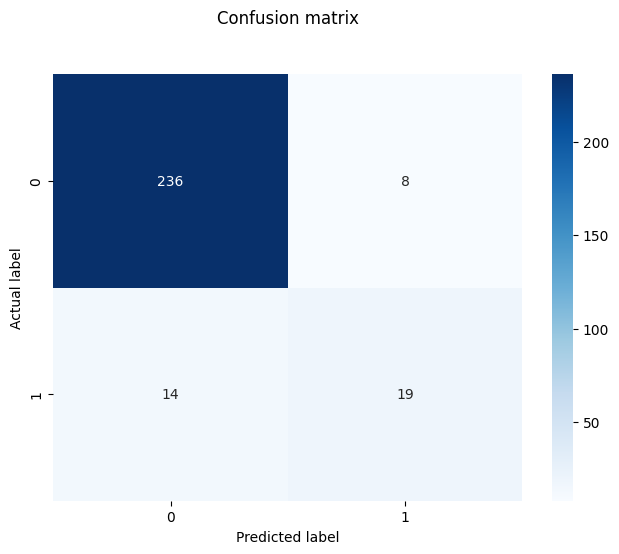

In [ ]:
class_names = [0, 1]
fig, ax = plt.subplots()
tick_marks = np.arange(len(class_names))
plt.xticks(tick_marks, class_names)
plt.yticks(tick_marks, class_names)
sns.heatmap(pd.DataFrame(cnf_matrix), annot=True, cmap="Blues", fmt='g')
ax.xaxis.set_label_position("bottom")
plt.tight_layout()
plt.title('Confusion matrix', y=1.1)
plt.ylabel('Actual label')
plt.xlabel('Predicted label')

plt.show()

In [ ]:
from sklearn.metrics import classification_report

print(classification_report(y_test, y_pred, target_names=['not anomaly', 'anomaly']))

              precision    recall  f1-score   support

 not anomaly       0.94      0.97      0.96       244
     anomaly       0.70      0.58      0.63        33

    accuracy                           0.92       277
   macro avg       0.82      0.77      0.79       277
weighted avg       0.92      0.92      0.92       277



In [ ]:
from sklearn.metrics import classification_report

print(classification_report(y_test, y_pred, target_names=['not anomaly', 'anomaly']))

              precision    recall  f1-score   support

 not anomaly       0.94      0.88      0.91       244
     anomaly       0.41      0.61      0.49        33

    accuracy                           0.85       277
   macro avg       0.68      0.74      0.70       277
weighted avg       0.88      0.85      0.86       277

